In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [2]:
data = pd.read_csv('loyalty_sub_info2.dsv', encoding = 'utf8')

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,14,15,17,27,28,38,45,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
new = data[['HS_MAKE','BTS_MU_PROVINCE','TARIFF_TYPE','SEX','REV_DATA_TOTAL','REV_VOICE_ONNET','REV_VOICE_OFFNET','REV_SMS_ONNET','REV_SMS_OFFNET','TOT_REV','SMILE_BALANCE','LOYALTY_POINTS_REDEEMED','LOYALTY_POINTS_BALANCE']]

In [5]:
# cleaning data

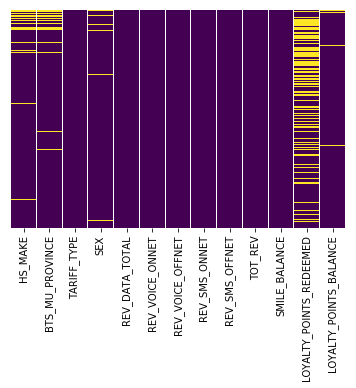

In [4]:
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
new['LOYALTY_POINTS_REDEEMED'].fillna(value=0, inplace=True)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [6]:
new['LOYALTY_POINTS_BALANCE'].fillna(value=0, inplace=True)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


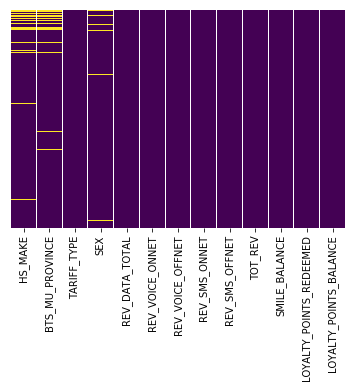

In [7]:
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#standardize the data using z-score to distribute the data normaly

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(new.drop(['HS_MAKE','BTS_MU_PROVINCE','TARIFF_TYPE','SEX'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(new.drop(['HS_MAKE','BTS_MU_PROVINCE','TARIFF_TYPE','SEX'],axis=1))

In [12]:
new_1 = pd.DataFrame(scaled_features,columns=new.drop(['HS_MAKE','BTS_MU_PROVINCE','TARIFF_TYPE','SEX'],axis=1).columns)

In [16]:
#looking for K value which is the number of cluster using the elbow curve approach

In [13]:
import pylab as pl

In [14]:
kvalues = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in kvalues]

In [15]:
val = [kmeans[i].fit(new_1).score(new_1) for i in range(len(kmeans))]

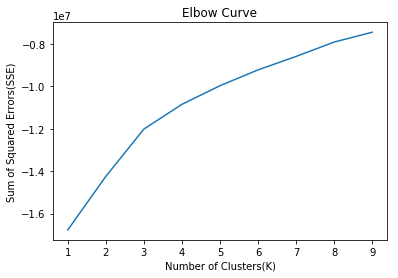

In [16]:
pl.plot(kvalues,val)
pl.xlabel('Number of Clusters(K)')
pl.ylabel('Sum of Squared Errors(SSE)')
pl.title('Elbow Curve')
pl.show()

In [21]:
#plot clusters

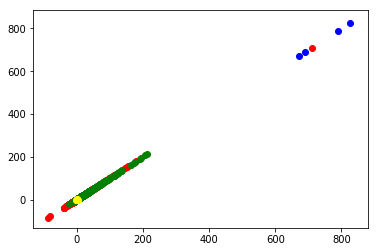

In [17]:
kmeans2=KMeans(n_clusters=5)
clusters=kmeans2.fit_predict(new_1)
new_1["Cluster"]=clusters

mat.scatter(new_1.loc[new_1.Cluster==0],new_1.loc[new_1.Cluster==0],color="red")
mat.scatter(new_1.loc[new_1.Cluster==1],new_1.loc[new_1.Cluster==1],color="green")
mat.scatter(new_1.loc[new_1.Cluster==2],new_1.loc[new_1.Cluster==2],color="blue")
mat.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
mat.show()

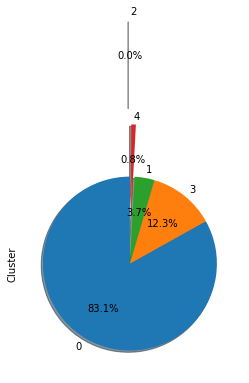

In [18]:
explode = (0.0, 0.0, 0.0, 0.6, 1.8)

new_1['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)

mat.gca().set_aspect('equal')

In [24]:
#Test model model

In [25]:
new_2 = new_1.drop('Cluster', axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(new_2,new_1['Cluster'],
                                                    test_size=0.50)

In [28]:
#

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
#

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
#Preparing for interpretation 

In [19]:
kmeans2=KMeans(n_clusters=5)
clusters=kmeans2.fit_predict(new_1)
new["Cluster"]=clusters

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


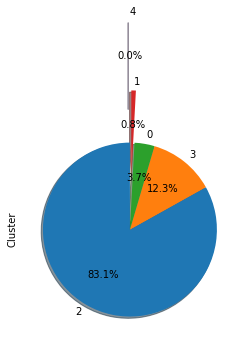

In [20]:
explode = (0.0, 0.0,0.0,0.6,1.4)

new['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)
mat.gca().set_aspect('equal')

In [ ]:
#Clusters

In [21]:
cluster_1 = new.loc[new['Cluster']==0]

In [23]:
cluster_2 = new.loc[new['Cluster']==1]

In [24]:
cluster_3 = new.loc[new['Cluster']==2]

In [25]:
cluster_4 = new.loc[new['Cluster']==3]

In [26]:
cluster_5 = new.loc[new['Cluster']==4]

In [ ]:
# Average calculations

In [377]:
gend = new.loc[new['SEX'] == 'F']

In [ ]:
new = data[['HS_MAKE','BTS_MU_PROVINCE','TARIFF_TYPE','SEX','REV_DATA_TOTAL','REV_VOICE_ONNET','REV_VOICE_OFFNET','REV_SMS_ONNET','REV_SMS_OFFNET','TOT_REV','SMILE_BALANCE','LOYALTY_POINTS_REDEEMED','LOYALTY_POINTS_BALANCE']]

In [403]:
cons = gend.loc[gend['Cluster'] == 3]

In [409]:
lin = cons.loc[cons['LOYALTY_POINTS_BALANCE']>0]

In [410]:
lin['LOYALTY_POINTS_BALANCE'].mean()

225.0591687151971

In [406]:
cons['SEX'].count()

128508

In [ ]:
#cleaning

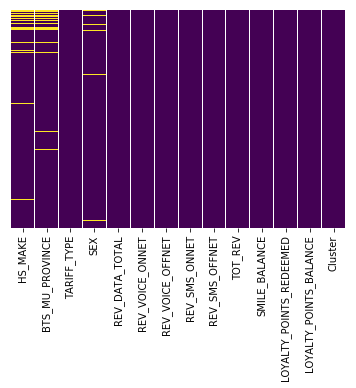

In [124]:
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [127]:
new.dropna(inplace=True)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


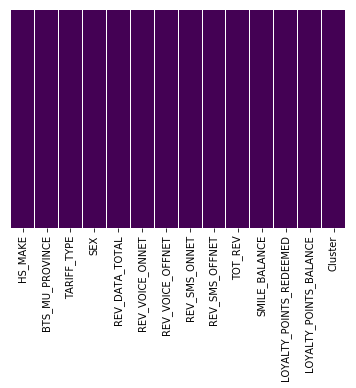

In [128]:
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
new = data[['HS_MAKE','BTS_MU_PROVINCE','TARIFF_TYPE','SEX','REV_DATA_TOTAL','REV_VOICE_ONNET','REV_VOICE_OFFNET','REV_SMS_ONNET','REV_SMS_OFFNET','TOT_REV','SMILE_BALANCE','LOYALTY_POINTS_REDEEMED','LOYALTY_POINTS_BALANCE']]

In [ ]:
# Top ten


In [521]:
cons = new.loc[new['BTS_MU_PROVINCE'] == 'FREE STATE']

In [531]:
con = cons.loc[cons['Cluster'] == 0]

In [532]:
lin = con.loc[con['LOYALTY_POINTS_REDEEMED']>0]

In [533]:
lin['LOYALTY_POINTS_REDEEMED'].mean()

88.00136892539356

In [186]:
cons = new.loc[new['Cluster'] == 4]

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='SEX',data=cons,palette='RdBu_r')

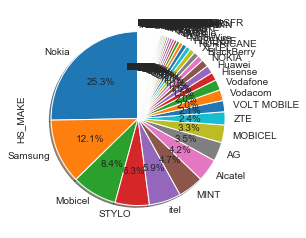

In [183]:
explode = (0.0)

cons['HS_MAKE'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
mat.gca().set_aspect('equal')

In [184]:
pec = cons.loc[(cons['HS_MAKE']=='Samsung') | (cons['HS_MAKE']=='Mobicel') | (cons['HS_MAKE']=='STYLO')
              | (cons['HS_MAKE']=='itel') | (cons['HS_MAKE']=='Nokia')|(cons['HS_MAKE']=='MINT')
              ]

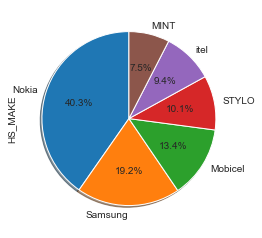

In [185]:
explode = (0.3,0.0,0.0,0.0,0.0)

pec['HS_MAKE'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
mat.gca().set_aspect('equal')

In [ ]:
explode = (0.2, 0.0,0.0,0.2,0.4,0.2,0.0,0.6,1.0)

cons['BTS_MU_PROVINCE'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)
mat.gca().set_aspect('equal')